# Predict client subscribing a term deposit project - Dự đoán khách hàng đăng ký một khoản tiền gửi có kỳ hạn


## 1. Giới thiệu về tập dữ liệu và đọc dữ liệu từ file

**Giới thiệu về tập dữ liệu**
> - **Bài toán**:
    - Tìm các chiến lược tốt nhất để cải thiện cho chiến dịch tiếp thị tiếp theo. Làm thế nào để tổ chức tài chính có thể mang lại hiệu quả cao hơn cho các chiến dịch tiếp thị trong tương lai? Để trả lời điều này, chúng ta phải phân tích chiến dịch tiếp thị cuối cùng mà ngân hàng thực hiện và xác định các mô hình sẽ giúp chúng ta tìm ra kết luận để phát triển các chiến lược trong tương lai.<br>
> - **Nguồn**:
    - Đây là tập dữ liệu cổ điển được tải lên ban đầu trong Kho lưu trữ Học máy UCI. [Moro và cộng sự, 2014] S. Moro, P. Cortez và P. Rita. Phương pháp tiếp cận theo hướng dữ liệu để dự đoán sự thành công của chiến dịch qua điện thoại của ngân hàng. Hệ thống hỗ trợ quyết định, Elsevier, 62: 22-31, tháng 6 năm 2014.
- **Link kaggle**: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset 

In [2]:
# import librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/bank.csv", delimiter=",")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# shape of dataframe
df.shape

(11162, 17)

In [5]:
# name of columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

**Thuộc tính:**
   1. **`age`**: tuổi của khách hàng (*numeric*)
   2. **`job`**: công việc hiện tại (*categorical*) 
   3. **`marital`**: tình trạng hôn nhân (*categorical*)
   4. **`education`**: trình độ giáo dục (*categorical*)
   5. **`default`**: trả nợ không đúng hạn (*categorical*) 
   6. **`balance`**: số dư trong tài khoản cá nhân (*numeric*) 
   7. **`housing`**: có khoản vay khi mua nhà (*categorical*) 
   8. **`loan`**: khoản vay cá nhân (*categorical*) 
   9. **`contact`**: phương tiện liên lạc (*categorical*) 
   10. **`day`**: ngày liên lạc cuối cùng trong tháng (1-31) (*numeric*)
   11. **`month`**: tháng liên lạc cuối cùng (*categorical*)
   12. **`duration`**: thời gian liên lạc cuối cùng, tính bằng giây (*numeric*) 
   13. **`campaign`**: số lần liên hệ của khách hàng trong chiến dịch này (*numerical*)
   14. **`pdays`**: số ngày đã qua tính từ lần liên hệ cuối cùng (*numeric*) 
   15. **`previous`**: số lần liên hệ đã thực trước chiến dịch này và cho khách hàng này (*numeric*) 
   16. **`poutcome`**: kết quả của chiến dịch tiếp thị trước đó (*categorical*) 
   17. **`deposit`**: (thuộc tính nhãn) khách hàng đồng ý hay không đồng ý gửi tiết kiệm (*categorical*) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Nhận xét:** 
- Tập dữ liệu không có giá trị bị khuyết (missing value)

In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [7]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


## 2. Exploratory Data Analysis - Phân tích dữ liệu khám phá

### Các thuộc tính categorical trong tập dữ liệu

In [7]:
# danh sách các thuộc tính categorical
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='object') 
                                                            & (feature not in ['deposit']))]
print('categorical: ', categorical_features)
print('numbers: ',len(categorical_features))

categorical:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numbers:  9


### Các thuộc tính numeric trong tập dữ liệu

In [8]:
# Danh sách các thuộc tính numeric
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') 
                                                            & (feature not in ['deposit']))]
print('numeric: ', numerical_features)
print('numbers: ', len(numerical_features))

numeric:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numbers:  7


### Phân phối của các thuộc tính numeric

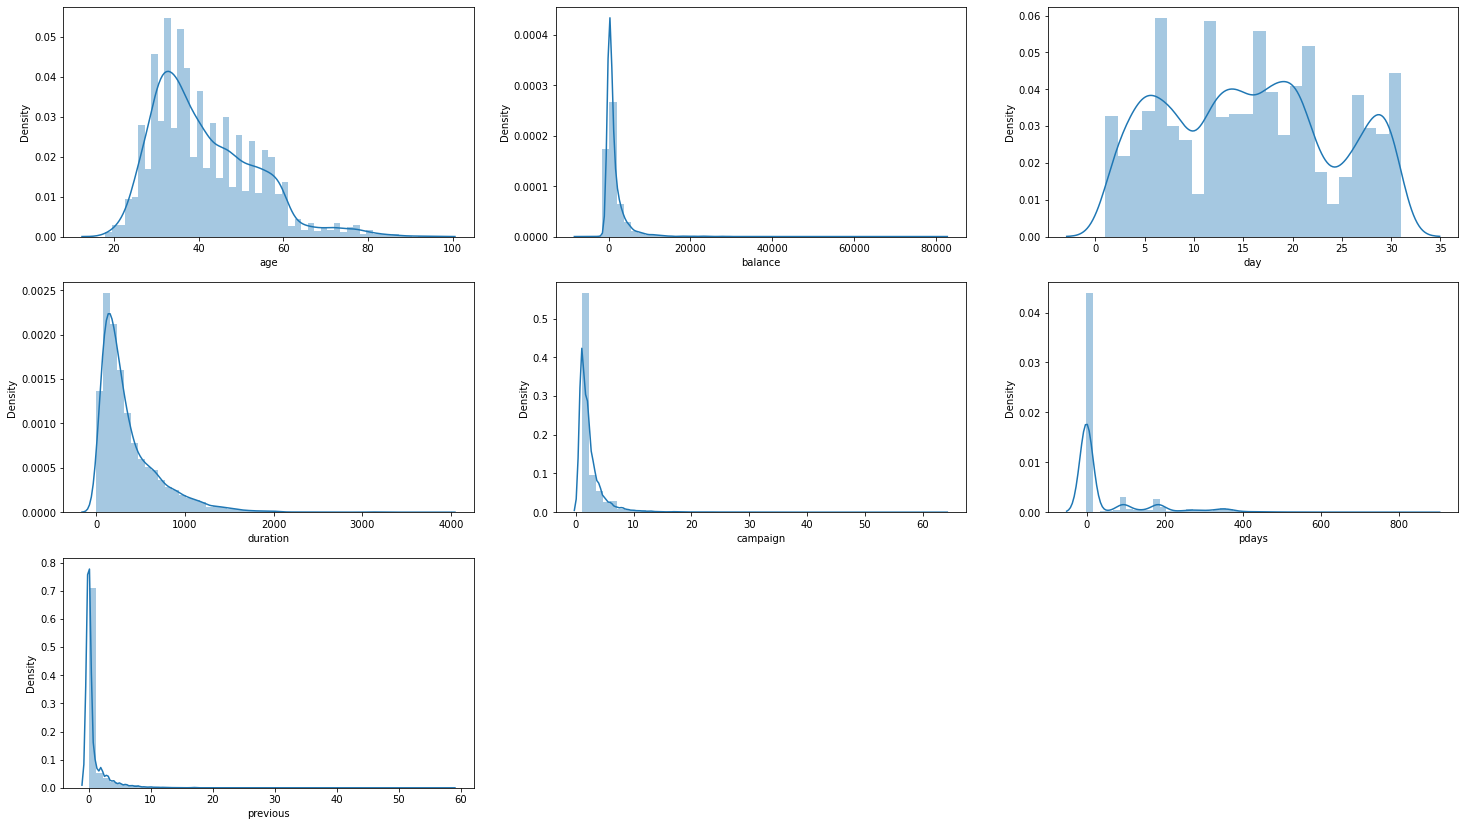

In [9]:
# Sử dụng đồ thị quan sát phân phối của các thuộc tính numeric
plt.figure(figsize=(25,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Thống kê mô tả với các thuộc tính numeric

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Nhận xét:**
- Miền giá trị của thuộc tính `age` là khá lớn
- Vì sao min của thuộc tính `pdays` là -1 và tỷ lệ của nó trong tập dữ liệu?

In [11]:
len(df.loc[df['pdays'] == -1])/len(df)

0.745744490234725

**Nhận xét**: 
- thuộc tính `pdays` có khoảng 75% giá trị là -1 có nghĩa ko biết chính xác số ngày đã qua từ lần liên lạc cuối

### Quan hệ giữa các thuộc tính numeric với biến mục tiêu (deposit)

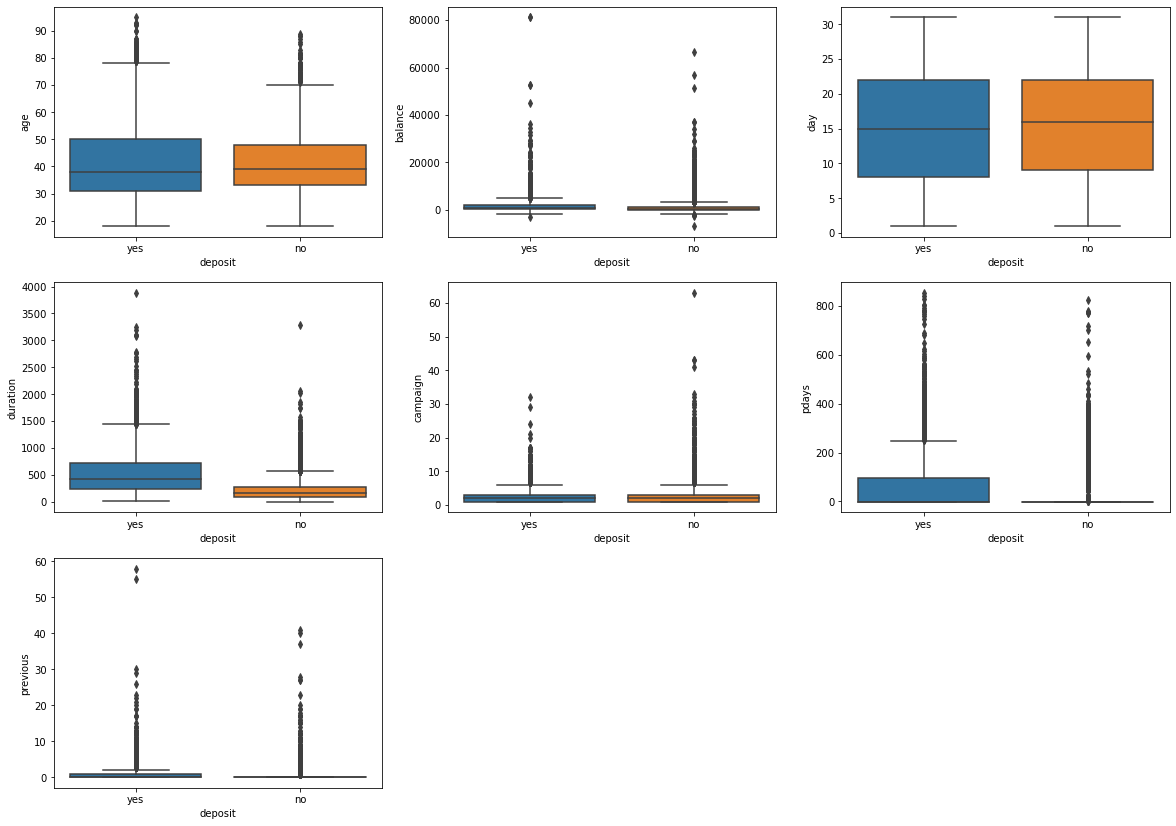

In [12]:
# Biểu đồ boxplot cho biết quan hệ giữa thuộc tính có kiểu numeric và thuộc tính 'deposit'
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel('deposit')
    plotnumber += 1
plt.show()

**Nhận xét**:
- Khoảng thời gian liên lạc càng lớn thì khả năng đồng ý một khoản tiền gửi cũng cao hơn

### Tìm các điểm outliers trong các biến numeric

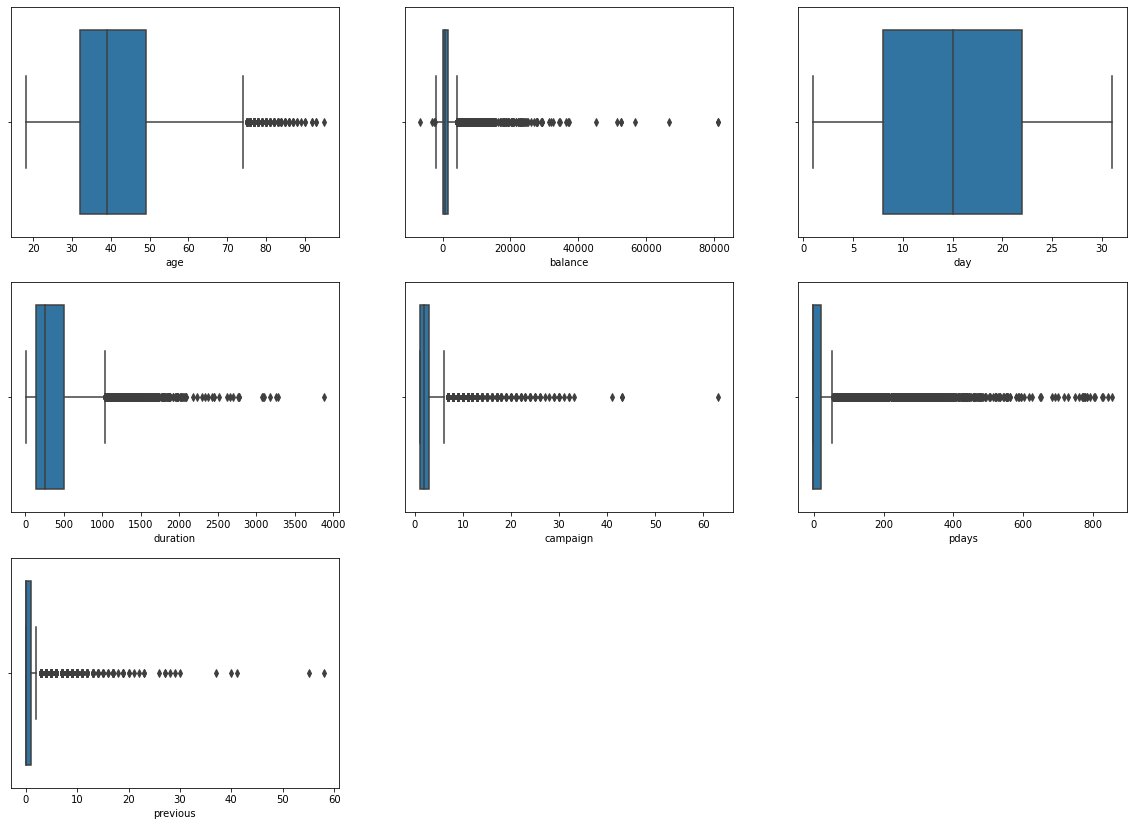

In [13]:
# Sử dụng đồ thị boxplot xác định các điểm outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Nhận xét**:
- Các thuộc tính `age`, `balance`, `duaration`, `campaign`, `pdays`, `previous` có khá nhiều điểm outliers

<AxesSubplot:>

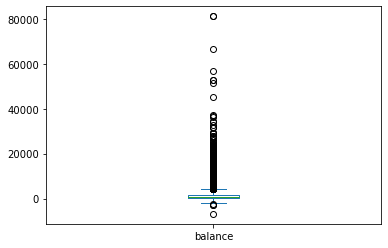

In [14]:
df['balance'].plot.box()

**Nhận xét**:
- Quan sát thuộc tính `balance` thì với những điểm outliers có giá trị quá lớn thì ta sẽ ko xử lý. Vì số dư tài khoản cá nhân lớn thì khả năng cao để họ có một khoản tiền gửi cũng lớn

### Xác định phân phối của các thuộc tính categorical

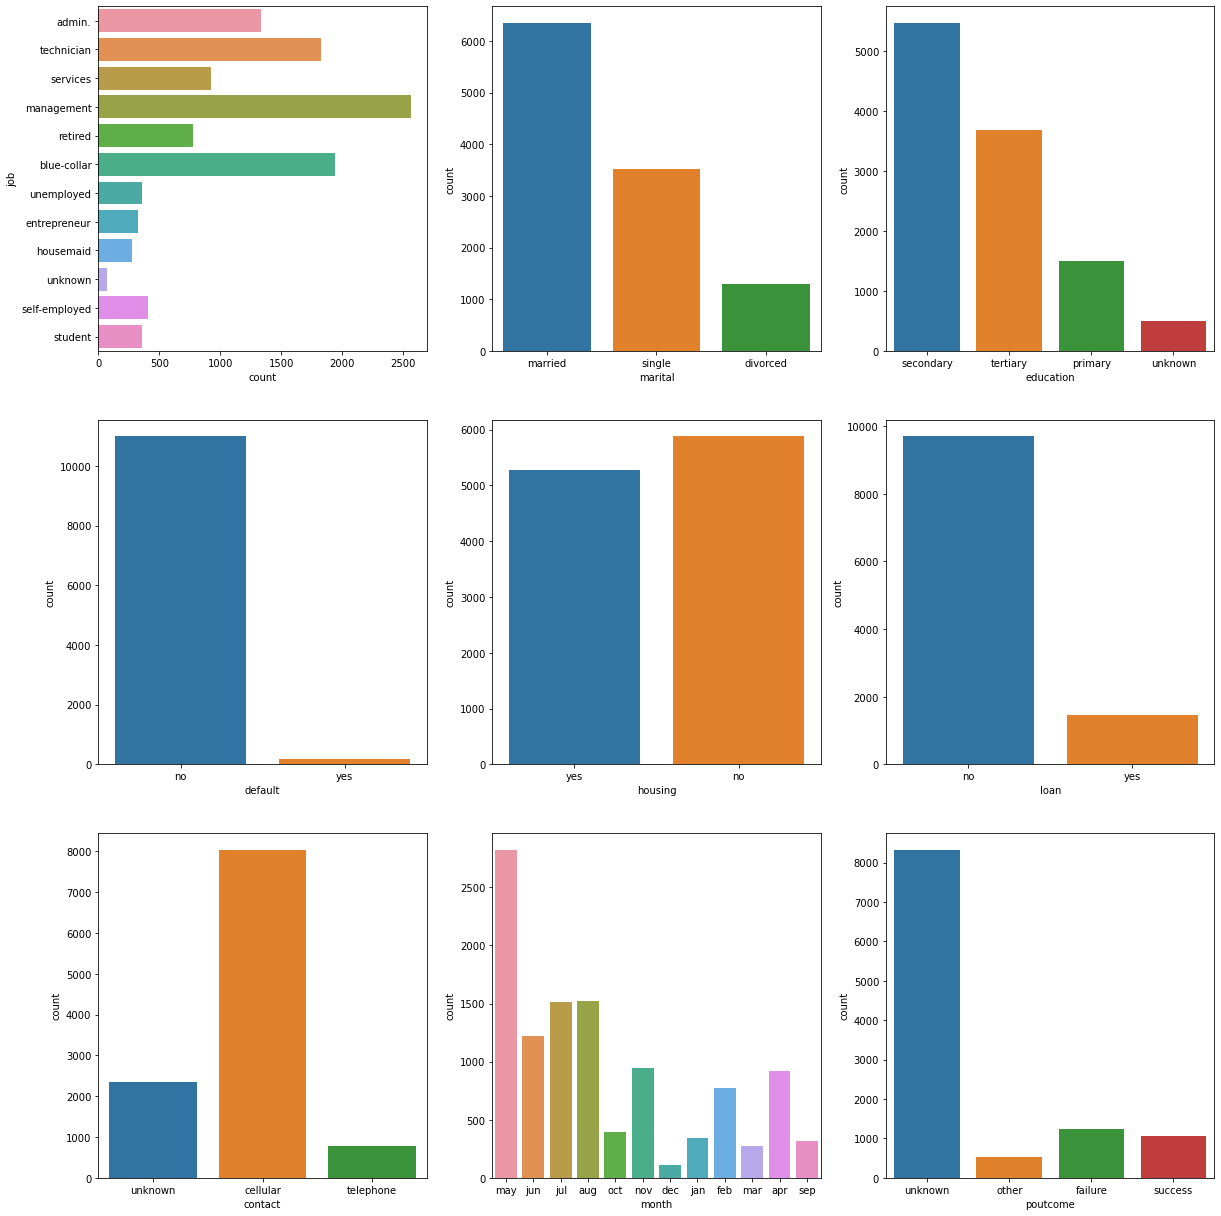

In [15]:
# Số lượng phân loại cụ thể của các thuộc tính numerical
plt.figure(figsize=(20,90), facecolor='white')
plotnumber = 1 
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3, plotnumber)
    if categorical_feature == 'job':
        sns.countplot(y=categorical_feature, data=df)
        plt.ylabel(categorical_feature)
    else:
        sns.countplot(x=categorical_feature, data=df)
        plt.xlabel(categorical_feature)
    plotnumber += 1
plt.show()

In [16]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

**Nhận xét**: 
- Những khách hàng có công việc là management là nhiều nhất và ít nhất là housemaid
- Những khách hàng có tình trạng hôn nhân là đã kết hôn là nhiều nhất và ít nhất là đã ly hôn
- Những khách hàng có nền tảng giáo dục là tốt nghiệp cấp 2 (secondary) là chiếm số lượng lớn nhất
- Ở thuộc tính defualt, tỷ lệ của những khách hàng trả nợ không đúng hạn là rất thấp nên khả năng ảnh hưởng đến quyết định có một khoản gửi ngân hàng sẽ rất thấp. Nên ta có thể xoá trước khi huấn luận mô hình.

### Quan hệ giữa 2 thuộc tính phân loại và biến mục tiêu (deposit)

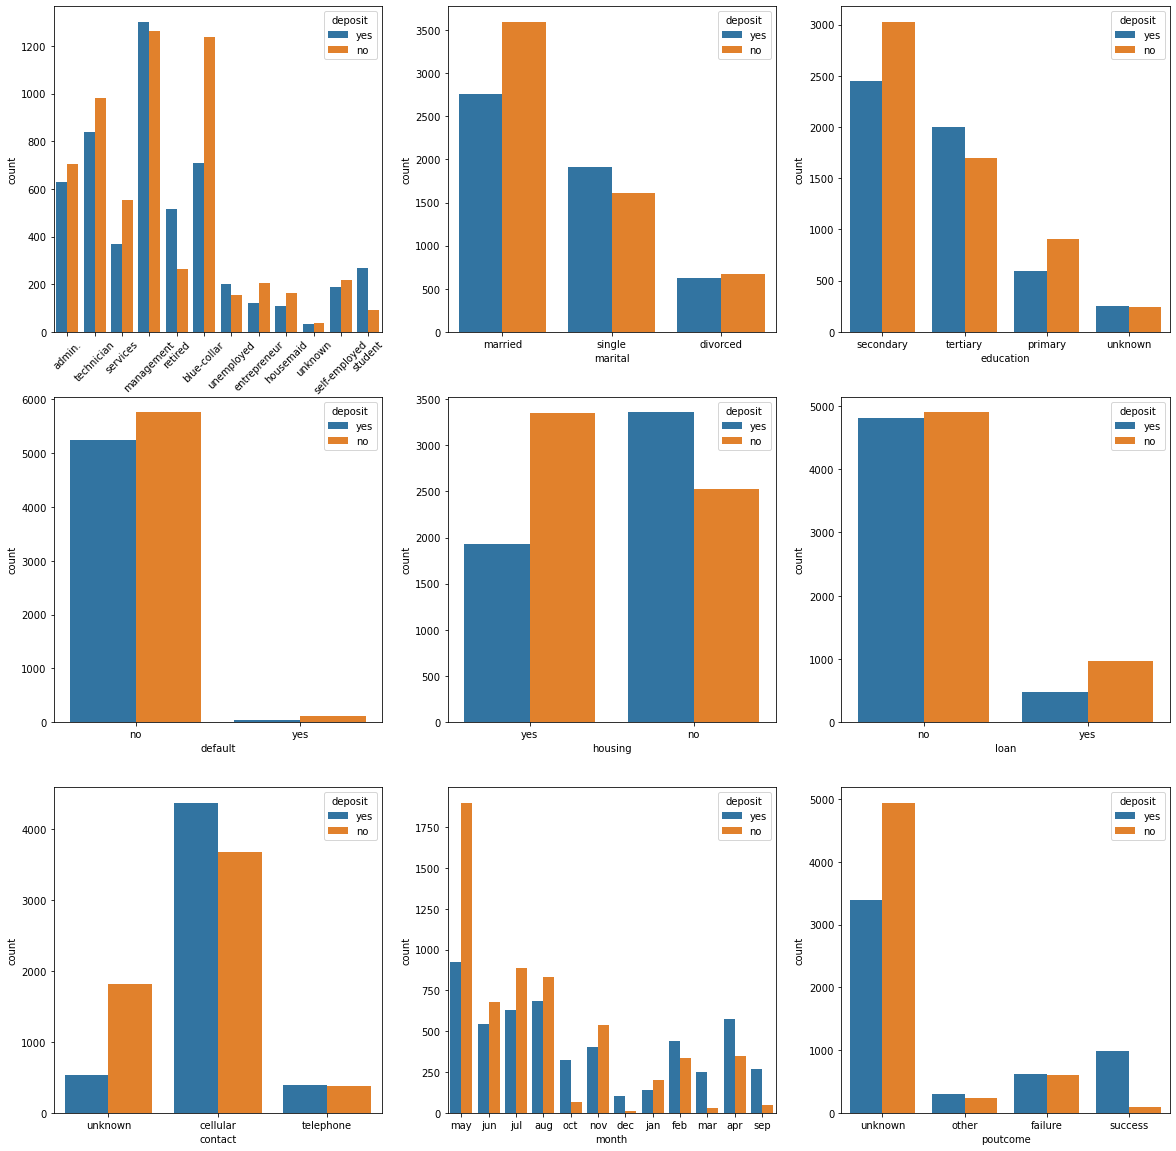

In [17]:
# We first review the 'Status' relation with categorical variables
plt.figure(figsize=(20,85), facecolor='white')
plotnumber = 1 
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3, plotnumber)
    sns.countplot(x=categorical_feature, hue='deposit', data=df)
    plt.xlabel(categorical_feature)
    if categorical_feature == 'job':
        plt.xticks(rotation=45)
    plotnumber += 1
plt.show()

**Nhận xét**:
- Dường như khách hàng đang có khoản vay cá nhân thì khả năng cao sẽ từ chối khoản tiền gửi
- Những khách hàng không có khoản vay mua nhà sẽ có xu hướng đồng ý với quyết định có khoản tiền gửi

### Ma trận hệ số tương quan giữa các thuộc tính numeric

In [18]:
# correlation matrix
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


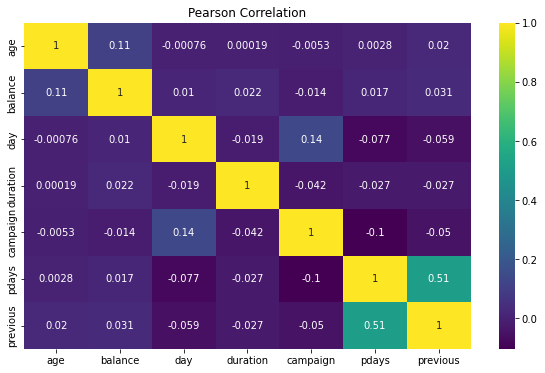

In [19]:
# visualize the correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

**Nhận xét:** Đa số các thuộc tính không có mối tương quan mạnh

### Kiểm tra cân bằng dữ liệu dựa trên biến mục tiêu (deposit)

In [20]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

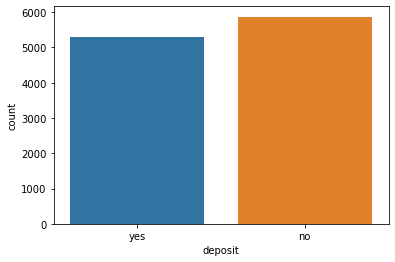

In [21]:
sns.countplot(x='deposit',data=df)
plt.show()

**Nhận xét:** Tập dữ liệu dường như cân bằng, với số lượng của 2 giá trị phân loại là ngang nhau.

## 3. Data preprocessing - Tiền xử lý dữ liệu 

In [8]:
# copy df sang dataframe khác để xử lý
df_final = df.copy()

### Xoá thuộc tính

In [9]:
# Xoá thuộc tính default
df_final.drop(['default'], axis=1, inplace=True)

In [10]:
# Xoá thuộc tính pdays vì có giá trị -1 (không biết giá trị chính xác) chiếm hơn 75%
df_final.drop(['pdays'], axis=1, inplace=True)

### Xử lý dữ liệu outliers

In [11]:
# campaign
df_final.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [12]:
# Xoá các điểm outliers không phù hợp của thuộc tính campaign
df_final_2 = df_final[df_final['campaign'] < 33]

In [13]:
# previous
df_final_2.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [14]:
# Xoá các điểm outliers không phù hợp của thuộc tính previous
df_final_3 = df_final_2[df_final_2['previous'] < 31]

### Mã hoá các thuộc tính categorical về numeric

In [15]:
df_encode = df_final_3.copy()

# handling categorical data
for i in df_encode.columns.tolist():
    if df_encode[i].dtype == object:
        df_encode[i] = df_encode[i].astype('category').cat.codes

df_encode.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1


In [16]:
X = df_encode.drop(columns=['deposit'])
Y = df_encode['deposit']

In [17]:
X.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3


## 4. Huấn luyện mô hình và dự đoán

In [17]:
# chia tập tập dữ liệu X_train, X_test, y_train, t_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
X_train.shape

(8921, 14)

In [19]:
X_test.shape

(2231, 14)

### Logistic regression

In [21]:
# Khởi tạo và huấn luyện mô hình
LogR_model = LogisticRegression()
LogR_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Dự đoán 
y_pred_LogR = LogR_model.predict(X_test)

In [23]:
# Xác định độ chính xác của mô hình
accuracy_LogG = accuracy_score(y_test, y_pred_LogR) 
print("Accuracy: %.2f%%" % (accuracy_LogG * 100.0))

Accuracy: 77.14%


In [24]:
# confusion matrix
cnf_matrix_LogR = confusion_matrix(y_test, y_pred_LogR)
print('Confusion matrix:')
print(cnf_matrix_LogR)

Confusion matrix:
[[958 221]
 [289 763]]


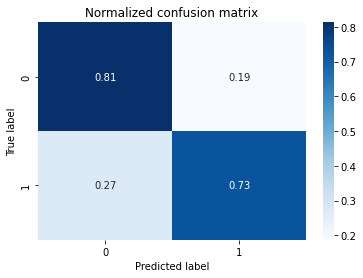

In [25]:
# biểu đồ confusion matrix chuẩn hoá
normalized_cnf_matrix_LogR = cnf_matrix_LogR/cnf_matrix_LogR.sum(axis = 1, keepdims = True)
sns.heatmap(pd.DataFrame(normalized_cnf_matrix_LogR), cmap="Blues", annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')
plt.show()

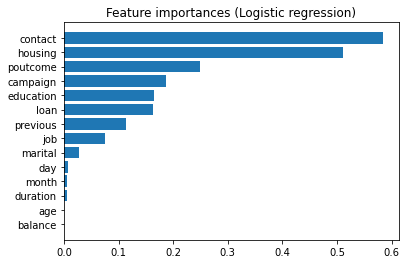

In [74]:
# Lấy ra các thuộc tính quan trọng từ mô hình 
LogR_feature_importances = np.abs(LogR_model.coef_[0]) 
indices = np.argsort(LogR_feature_importances)

# Vẽ biểu đồ mức độ ảnh hưởng của các thuộc tính đến mô hình
fig, ax = plt.subplots()
ax.barh(range(len(LogR_feature_importances)), LogR_feature_importances[indices])
ax.set_yticks(range(len(LogR_feature_importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.title('Feature importances (Logistic regression)')

plt.show()

### Decesion tree classifier

In [38]:
# Khởi tạo và huấn luyện mô hình
DecTree_model = DecisionTreeClassifier()
DecTree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Dự đoán 
y_pred_DecTree = DecTree_model.predict(X_test)

In [40]:
# Xác định độ chính xác của mô hình
accuracy_DecTree = accuracy_score(y_test, y_pred_DecTree) 
accuracy_score(y_test, y_pred_DecTree) 
print("Accuracy: %.2f%%" % (accuracy_DecTree * 100.0))

Accuracy: 77.01%


In [41]:
# confusion matrix
cnf_matrix_DecTree = confusion_matrix(y_test, y_pred_DecTree)
print('Confusion matrix:')
print(cnf_matrix_DecTree)

Confusion matrix:
[[945 234]
 [279 773]]


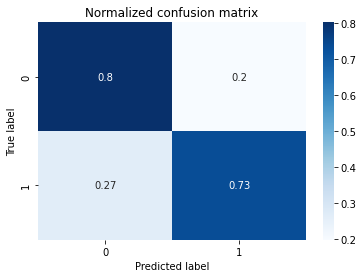

In [42]:
# biểu đồ confusion matrix chuẩn hoá
normalized_cnf_matrix_DecTree = cnf_matrix_DecTree/cnf_matrix_DecTree.sum(axis = 1, keepdims = True)
sns.heatmap(pd.DataFrame(normalized_cnf_matrix_DecTree), cmap="Blues", annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')
plt.show()

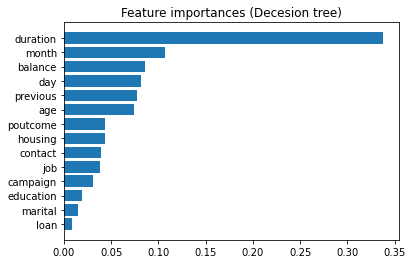

In [72]:
# Lấy ra các thuộc tính quan trọng từ mô hình 
importances = DecTree_model.feature_importances_
indices = np.argsort(importances)

# Vẽ biểu đồ mức độ ảnh hưởng của các thuộc tính đến mô hình
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.title('Feature importances (Decesion tree)')

plt.show()

In [ ]:
# Lựa chọn lại các thuộc tính
features = ['duration', 'month', 'balance', 'day', 'previous', 'age']
# Khởi tạo và huấn luyện mô hình
DecTree_model_2 = DecisionTreeClassifier()
DecTree_model_2.fit(X_train[features], y_train)

In [ ]:
# Dự đoán 
y_pred_DecTree_2 = DecTree_model_2.predict(X_test[features])
# Xác định độ chính xác của mô hình
accuracy_DecTree_2 = accuracy_score(y_test, y_pred_DecTree_2) 
accuracy_score(y_test, y_pred_DecTree_2) 
print("Accuracy: %.2f%%" % (accuracy_DecTree_2 * 100.0))

### XGBCClassifier

In [29]:
# Khởi tạo và huấn luyện mô hình
model_XGBC = XGBClassifier() 
model_XGBC.fit(X_train, y_train, eval_metric="auc", verbose=True)
 
# Dự đoán
y_predict_XGBC = model_XGBC.predict(X_test) 
 
# Xác định độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_predict_XGBC) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.03%


In [30]:
# confusion matrix
cnf_matrix_XGBC = confusion_matrix(y_test, y_predict_XGBC)
print('Confusion matrix:')
print(cnf_matrix_XGBC)

Confusion matrix:
[[988 191]
 [143 909]]


In [1]:
# biểu đồ confusion matrix chuẩn hoá
normalized_cnf_matrix_XGBC = cnf_matrix_XGBC/cnf_matrix_XGBC.sum(axis = 1, keepdims = True)
sns.heatmap(pd.DataFrame(normalized_cnf_matrix_XGBC), cmap="Blues", annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')
plt.show()

NameError: name 'cnf_matrix_XGBC' is not defined

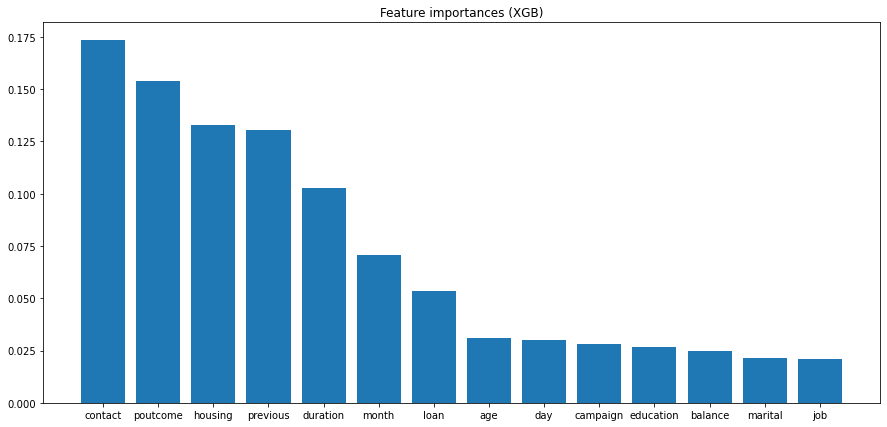

In [37]:
# Lấy ra các thuộc tính quan trọng từ mô hình 
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_XGBC.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

# biểu đồ mức độ ảnh hưởng của các thuộc tính đến mô hình
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.title('Feature importances (XGB)')

plt.show()

## 5. Nhận xét và tổng kết

- **Nhận xét**:
   - Mô hình logistic regression chưa thực sự phân lớp tốt. Giá trị precesion chưa thực sự cao để có thể tìm ra những khách hàng tiềm năng cho những chiến dịch tiếp theo. 
   - Có thể tối ưu hoá mô hình bằng việc lựa chọn và tạo ra những thuộc tính mới để đưa vào mô hình. <br>
- **Tổng kết**:
   - Nhóm đã biết được quy trình của một project huấn luyện một mô hình máy học cơ bản để đưa ra dự đoán.
   - Có kiến thức cơ bản để phân loại và sử dụng mô hình phù hợp cho bộ dữ liệu (linear regression, logistic regression, decesion tree).
   - Sử dụng các thao tác cơ bản với các thư viện như numpy, pandas, matplotlib, sklearn để chuẩn bị dữ liệu và huấn luyện mô hình học máy.